In [1202]:
#pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install


In [1203]:
# install
#!pip install pretty-jupyter


In [1204]:
# export
#jupyter nbconvert --to html --template pj /path/to/ipynb/file

In [123]:
#bez instalowania paczek do ladnych raportow
#[Link Text](#Target-Header) # musza byc myslniki zamiast spacji

## opis kolumn

    Booking_ID: unique identifier of each booking
    no_of_adults: Number of adults
    no_of_children: Number of Children
    no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
    no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
    type_of_meal_plan: Type of meal plan booked by the customer:
    required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
    room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
    lead_time: Number of days between the date of book
    arrival_date: Date of the monthing and the arrival date
    arrival_year: Year of arrival date
    arrival_month: Month of arrival date
    market_segment_type: Market segment designation.
    repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
    no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
    no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
    avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
    no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
    booking_status: Flag indicating if the booking was canceled or not.


# Table of Contents

1. [Wczytanie bibliotek](#Wczytanie-bibliotek)
2. [EDA and Data Cleaning](#EDA-and-Data-Cleaning)

# Wczytanie bibliotek

In [195]:
#%reset 
#służy do czyszczenia interaktywnej przestrzeni nazw, ale umożliwia również czyszczenie pamięci podręcznej wejścia i wyjścia
#rysuje tylko pierwszy wiersz macierzy po aktuaizacji biblioek wiec musze zainstalowac starsza wersje

# %who 
#wyswietla zmienne w srodowisku

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as mpl
import scipy.stats as st
import seaborn as sns
import time
print(sns.__version__)
print(mpl.__version__)
# Ignore any deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# do pomiaru czasu uczenia modeli
# %time podaje czas
# %timeit mierzy kilka razy i podaje uśrednioną wartość (dokładniejszą) - samo dostosowuje liczbe ile razy mierzy
#jesli daje jeden procent '%' to mierzy tylko daną linie, jesli dwa procenty to ustawiam na początku komórki
#ten procent w lniijce dziala tylko w notebookach
#poza trzebaby uzyc:import timeit
# def load_csv():
#     df = pd.read_csv("Hotel Reservations.csv")

# timeit.timeit(load_csv, number=100)

%matplotlib inline

0.13.0
3.7.3


In [196]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# EDA and Data Cleaning

In [197]:
df = pd.read_csv("Hotel Reservations.csv")
#wyrzucam kolumne Booking_ID bo to zbędny indeks

#do operacji usunięcia kolumny stosujemy metode 'drop' z parametrem axis=1 , do wierszy axis=0
df = df.drop('Booking_ID', axis=1)
# #CPU times shows the time you used your CPU.
# Wall time shows the real time elapsed since the beginning of the cell. This is the time you are interested in.


df2= df.copy() #VERY IMPORTANT jesli uzyje copy to zmiana w jednym nie wplywa na drugia jesli po prostu przypisze to zmiany w obu nastepuja
#df do regresji log
#df2 dane do wizualizacji
#df3 do KNN
#df4 do pór roku

In [198]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [199]:
df.shape

(36275, 18)

In [200]:
#mamy 36 tysiecy wierszy i 19 kolumn

### zamiana zmiennych kategorycznych w postaci tekstu na liczby

In [201]:
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [202]:
condition = (df['avg_price_per_room'] == 0)

count_zero_values = condition.sum()

print(f'Liczba wierszy z wartością 0 w kolumnie avg_price_per_room: {count_zero_values}')

Liczba wierszy z wartością 0 w kolumnie avg_price_per_room: 545


niby brak NA ale zamiast tego mogą być bezsensowne zera jak np w kolumnie avg_price_per_room, usuwam je

In [203]:
df = df[~condition]

Podzielmy kolumny na binarne, kategoryczne i numeryczne (ciągłe)

### zamiana zmiennych kategorycznych w postaci tekstu na liczby

In [204]:
# Sprawdźmy kolumny w których nie mamy danych liczbowych
non_float_columns = df.select_dtypes(exclude=['float', 'int']).columns

print("Kolumny z typami danych innymi niż liczbowe:")
print(non_float_columns)

Kolumny z typami danych innymi niż liczbowe:
Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')


In [205]:
df[non_float_columns].head()

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled


In [206]:
#sprawdzam jakie wartości mają kolumny z tekstem
#gdyby był błąd w ramce typu, że Room_Type 4 by był zapisany jeszcze jako Room Type 4 gdzieś to można użyc funkcji where aby zastapic poprawna wartoscia
# df['room_type_reserved'] = np.where(df['room_type_reserved']=='Room Type 4', 'Room_Type 4', df['room_type_reserved'])

unique1=df['type_of_meal_plan'].unique().tolist()
unique2=df['room_type_reserved'].unique().tolist()
unique3=df['market_segment_type'].unique().tolist()
#oraz zmienna ktora bedziemy przewidywac
unique4=df['booking_status'].unique().tolist()
print(unique1)
print(unique2)
print(unique3)
print(unique4)

['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3']
['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
['Not_Canceled', 'Canceled']


Ponieważ większość algorytmów uczenia maszynowego woli zmienne liczbowe od tekstowych dokonam zamiany z tekstu na liczby.

In [207]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [208]:
# I SPOSOB
#za pomoca sklearn tworzy poprostu liczby zamiast kategorii

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['type_of_meal_plan'] = le.fit_transform(df.type_of_meal_plan)
# print(df['type_of_meal_plan'].value_counts())
# print(df['type_of_meal_plan'].sample(5))

#ale tutaj zastosuje one hot encoding bo nie widze hierarchii



#sprobuje one-hot-encoding bo nie widze hierarchii
#df = pd.get_dummies(data=df, columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
#

#wszystko sie zaczyna od 0


# II SPOSOB

# class_mapping1 = {value: index for index, value in enumerate(unique1)} #tworzenie slownika jednoliniowo
# df['type_of_meal_plan'] = df['type_of_meal_plan'].map(class_mapping1)

# class_mapping2 = {value: index for index, value in enumerate(unique2)}
# df['room_type_reserved'] = df['room_type_reserved'].map(class_mapping2)

# class_mapping3 = {value: index for index, value in enumerate(unique3)}
# df['market_segment_type'] = df['market_segment_type'].map(class_mapping3)

# III SPOSOB

# #eq do 0 - 1 tylko
#zmienna przewidywana

# df['booking_status'] = df['booking_status'].eq('Not_Canceled').astype(int)

#mozna byc tez uzyc from sklearn.preprocessing import Binarizer
# lb=LabelBinarizer()
# for column in binary_variables:
#     df[column] = lb.fit_transform(df[column])
    #oczywiscie najpierw trzeba stwierdzic ktore kolumny maja tylko 2 mozliwe wartosci

#######################
#The eq() method compares each value in a DataFrame to check if it is equal to a specified value, or a value from a specified DataFrame objects, and returns a DataFrame with boolean True/False for each comparison
#not canceled stał sie '0' a canceled '1'
#######################

#przyklady inne

# IV SPOSOB

# albo replace - rowniez do wiekszej liczby kategorii, za pomocą słownika
#data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

# V SPOSOB
#albo mapowaniem ręcznym
# class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
# data['Class'] = data['Class'].map(class_mapping)


In [209]:
#zapisanie przed zastosowaniem get_dummies zeby zastosowac inny encoding pozniej
df['booking_status'] = df['booking_status'].eq('Not_Canceled').astype(int)
df3=df.copy()
df = pd.get_dummies(data=df, columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

In [210]:
df.shape 
#zwiekszyla sie liczba kolumn o liczbe kategorii w kolumnach dodanych w get dummies

(35730, 31)

In [211]:
# df.info() pokazuje wiecej niz 
# df.dtypes
df.info()
#sprawdzam typy danych czy sa rozne ilosci niepustych wartosci w kolumnach
# juz widac ze nie ma pustych wartosci w zbiorze
# gdyby byly puste wartosci mozna je w najprostszy sposob zastapiac srednia, mediana,
# lub zastosowac
# data = data.fillna(method='ffill') 
# which fills the last observed non-null value forward until another non-null value is encountered.


<class 'pandas.core.frame.DataFrame'>
Index: 35730 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          35730 non-null  int64  
 1   no_of_children                        35730 non-null  int64  
 2   no_of_weekend_nights                  35730 non-null  int64  
 3   no_of_week_nights                     35730 non-null  int64  
 4   required_car_parking_space            35730 non-null  int64  
 5   lead_time                             35730 non-null  int64  
 6   arrival_year                          35730 non-null  int64  
 7   arrival_month                         35730 non-null  int64  
 8   arrival_date                          35730 non-null  int64  
 9   repeated_guest                        35730 non-null  int64  
 10  no_of_previous_cancellations          35730 non-null  int64  
 11  no_of_previous_booki

In [212]:
# Sa tu dane kategoryczne w postaci liczb calkowitych, object ktore sa tak naprawde string (bo wczytujemy z csv) oraz dane zmiennoprzecinkowe liczbowe ciągłe

Od razu widać też, że nie mamy pustych wartości, ale sprawdzę to jeszcze funkcją isna.

In [213]:
#liczba pustych wartosci w kolumnach
# isnull is an alias for isna
#df.isnull().sum()
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
type_of_meal_plan_Meal Plan 1           0
type_of_meal_plan_Meal Plan 2           0
type_of_meal_plan_Meal Plan 3           0
type_of_meal_plan_Not Selected          0
room_type_reserved_Room_Type 1          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5    

Nie ma pustych komórek więc nie trzeba ich usuwać lub uzupełniać.

#### czy usuwac elemnty kodu ktore nic nie wnosza dla widza a sa dla mnie zeby spojrzec na dane?> nie do pliku raportu a do pliku do prezentacji tak

In [214]:
df.describe().round(2)
# funkcja pokazujaca podstawowe statystyki dla kolumn liczbowych
#trzeba spojrzec czy nie rozni sie bardzo min od np 1 kwartyla

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00
mean,1.85,0.11,0.82,2.22,0.03,86.19,2017.82,7.41,15.61,0.02,0.02,0.13,105.00,0.62,0.67
std,0.52,0.40,0.87,1.41,0.17,85.97,0.38,3.06,8.75,0.15,0.36,1.64,32.93,0.78,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.50,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,18.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.85,0.00,0.00
50%,2.00,0.00,1.00,2.00,0.00,58.00,2018.00,8.00,16.00,0.00,0.00,0.00,100.00,0.00,1.00
75%,2.00,0.00,2.00,3.00,0.00,128.00,2018.00,10.00,23.00,0.00,0.00,0.00,121.00,1.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,13.00,58.00,540.00,5.00,1.00


# Wizualizacja

## Pory roku

In [215]:
#Jeśli mogę cokolwiek powiedzieć o jakims wykresie to zostawić

In [216]:
df2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [217]:
df4=df2.copy()

In [218]:
#wyrzucam wszystkie wiersze gdzie był 29 lutego w 2018 roku (a według kalendarza nie było takiego dnia) bo nie działa funkcja to_datetime przez to
indexes = df4.loc[(df2['arrival_year'] == 2018) & (df2['arrival_month'] == 2) & (df2['arrival_date'] == 29)].index

df4=df2.drop(indexes)

In [219]:
# na podstawie 3 kolumn przedstawiających rok miesiąc i dzień stworzę jedną za pomocą funkcji pandas.to_datetime This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [220]:
# Stworzenie kolumny z całą datą w formacie europejskim
df4['arrival_date'] = pd.to_datetime(df4[['arrival_year', 'arrival_month', 'arrival_date']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

In [221]:
condition1 = (df4['arrival_date'].between('2017-07-01', '2018-03-31'))
condition2 = (df4['arrival_date'].between('2018-03-01', '2019-01-31'))

# Liczba wierszy dla każdego okresu
count1 = len(df4[condition1])
count2 = len(df4[condition2])

print(f'Liczba wierszy w okresie 2017-07 do 2018-03: {count1}')
print(f'Liczba wierszy w okresie 2018-03 do 2019-01: {count2}')

Liczba wierszy w okresie 2017-07 do 2018-03: 11553
Liczba wierszy w okresie 2018-03 do 2019-01: 27043


W pierwszej połowie szeregu czasowego jest znacznie więcej obserwacji więc ciężko będzie narysować jakiś wykres zależności od czasu który np sprawdziłby czy był jakiś trend w czasie w np. ilości zabieranych dzieci bo zawsze będzie pokazywać, że w pierwszej połowie było dużo mniej a następnie widać wzrost który nie wynika z trendu a z większej ilości obserwacji.

In [222]:
condition = (df4['avg_price_per_room'] == 0)
df4 = df4[~condition]

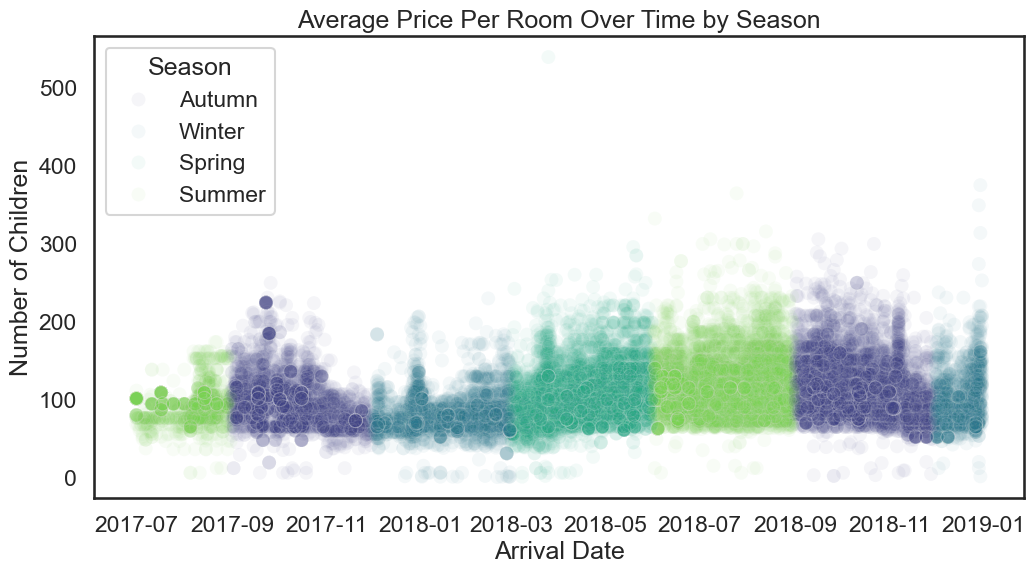

In [223]:
# Wydobycie osobnych kolumn dla roku, miesiąca i dnia
df4['year'] = df4['arrival_date'].dt.year
df4['month'] = df4['arrival_date'].dt.month
df4['day'] = df4['arrival_date'].dt.day

# Mapowanie miesięcy na pory roku
seasons_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df4['season'] = df4['month'].map(seasons_mapping)

# Wykres punktowy liczby dzieci w zależności od daty z podziałem na pory roku
plt.figure(figsize=(12, 6))
sns.scatterplot(x='arrival_date', y='avg_price_per_room', hue='season', data=df4, palette='viridis', s=100, alpha=0.05)
plt.title('Average Price Per Room Over Time by Season')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Children')
plt.legend(title='Season')
plt.show()

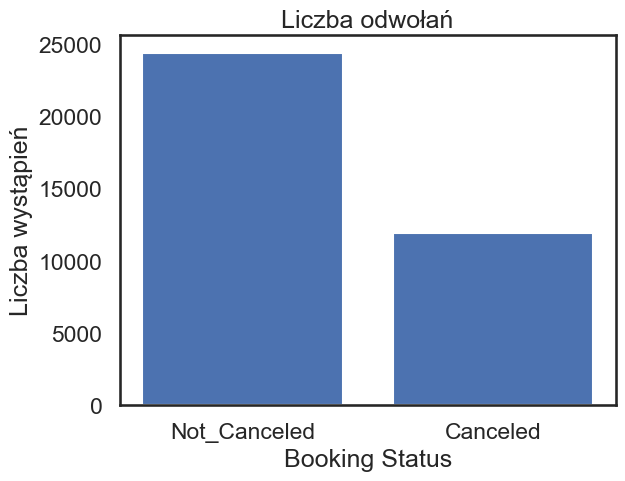

In [224]:
plt.bar(df2['booking_status'].value_counts().index, df2['booking_status'].value_counts())
plt.xlabel('Booking Status')
plt.ylabel('Liczba wystąpień')
plt.title('Liczba odwołań')

plt.show()

Liczba odwołan jest 2 razy mniejsza od rezerwacji gdzie nie było odwołań.

In [225]:
filtered_df = df2[df2['room_type_reserved'] != 'Room_Type 1']
filtered_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled
11,1,0,2,1,Meal Plan 1,0,Room_Type 4,35,2018,4,30,Online,0,0,0,140.40,1,Not_Canceled
27,1,0,0,2,Meal Plan 1,0,Room_Type 4,2,2018,5,19,Aviation,0,0,0,110.00,0,Canceled
30,2,0,1,1,Meal Plan 1,0,Room_Type 4,3,2017,9,19,Online,0,0,0,177.50,1,Not_Canceled


In [226]:
#kilka wykresow naraz za pomoca subplot

In [227]:
df2['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

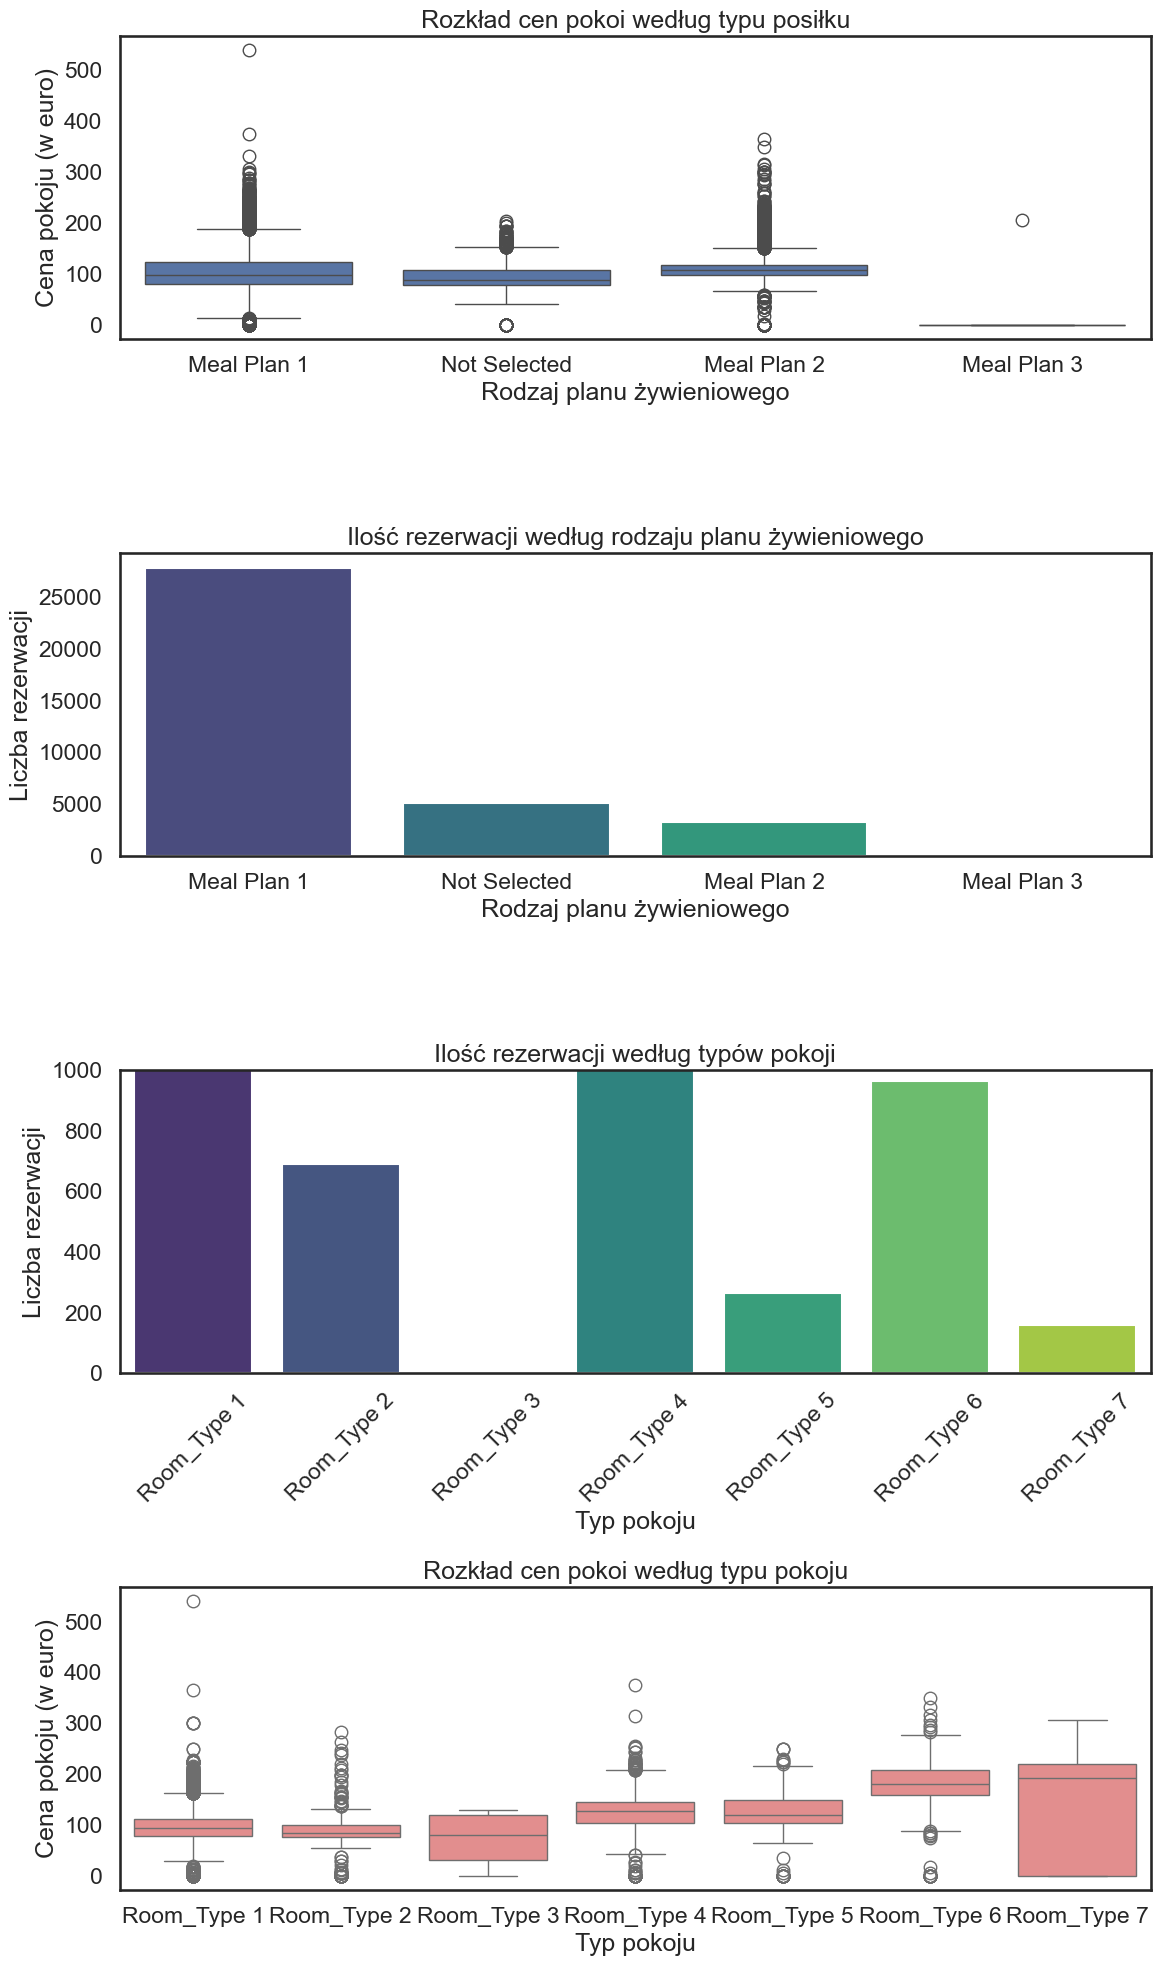

In [228]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))


#dla podwykresow musimy ustawic `set_title/set_xlabel/set_ylabel` a nie title/xlabel/ylabel bo one sa do calego rysunku
sns.boxplot(data=df2, x='type_of_meal_plan', y='avg_price_per_room',ax=axes[0])
axes[0].set_title('Rozkład cen pokoi według typu posiłku')
axes[0].set_xlabel('Rodzaj planu żywieniowego')
axes[0].set_ylabel('Cena pokoju (w euro)')

sns.countplot(data=df2, x='type_of_meal_plan', ax=axes[1], palette='viridis')
axes[1].set_title('Ilość rezerwacji według rodzaju planu żywieniowego')
axes[1].set_xlabel('Rodzaj planu żywieniowego')
axes[1].set_ylabel('Liczba rezerwacji')


#trzeba pamiec zeby wpisac wszystie rodzaje zmiennych chyba ze chcemy wykluczyc z wykresu jakas, bo pominalem Room_type 7 i zmienila sie skala
room_type_order = ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7']

#
#df_bez_Room_1 = df2[df2['room_type_reserved'] != 'Room_Type 1']
#zamiast wyrzucac Room1 ktore zaburza zakres osi y, zmienie zakres
#sns.countplot(data=df2, x='type_of_meal_plan', ax=axes[2], hue='type_of_meal_plan', palette='viridis', legend=True)
sns.countplot(data=df2, x='room_type_reserved', ax=axes[2], order=room_type_order, palette='viridis')
axes[2].set_title('Ilość rezerwacji według typów pokoji')
axes[2].set_xlabel('Typ pokoju')
axes[2].set_ylabel('Liczba rezerwacji')
axes[2].set_ylim(top=1000)  # adjust the top leaving bottom unchanged


sns.boxplot(data=df2, x='room_type_reserved', y='avg_price_per_room', ax=axes[3], order=room_type_order,color = 'lightcoral')
axes[3].set_title('Rozkład cen pokoi według typu pokoju')
axes[3].set_xlabel('Typ pokoju')
axes[3].set_ylabel('Cena pokoju (w euro)')
#Obrocenie podpisow osi x
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()
#posortowac

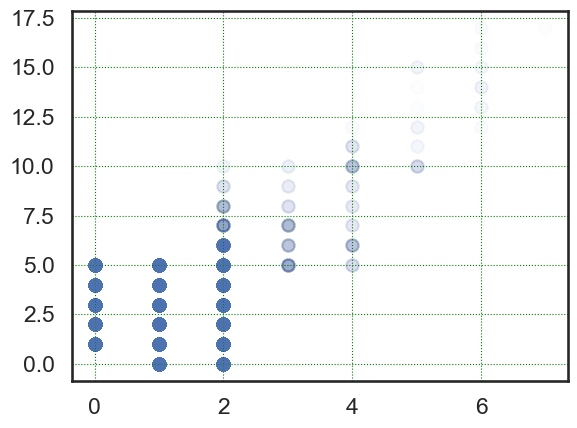

In [229]:
plt.scatter(df.no_of_weekend_nights, df.no_of_week_nights, alpha=0.01)
plt.grid(color='green', linestyle='dotted', linewidth=0.8)
#sprobowac pokolorowac na kolor czy odwolane czy nie
#sprawdzmy czy danea sa prawidlowe np czy liczba zarezerowania dni w weekend jest skorelowana z liczba
#dni na tygodniu czyli np cyz ktos zostal na pelne 2 tyg

Liczba dni rezerwacji na tygodniu i na weekend są liniowo skorelowane. Dodatkowo widać, że najwięcej osób rezerwuje 5 dni roboczych lub 2 dni weekendowe lub to i to

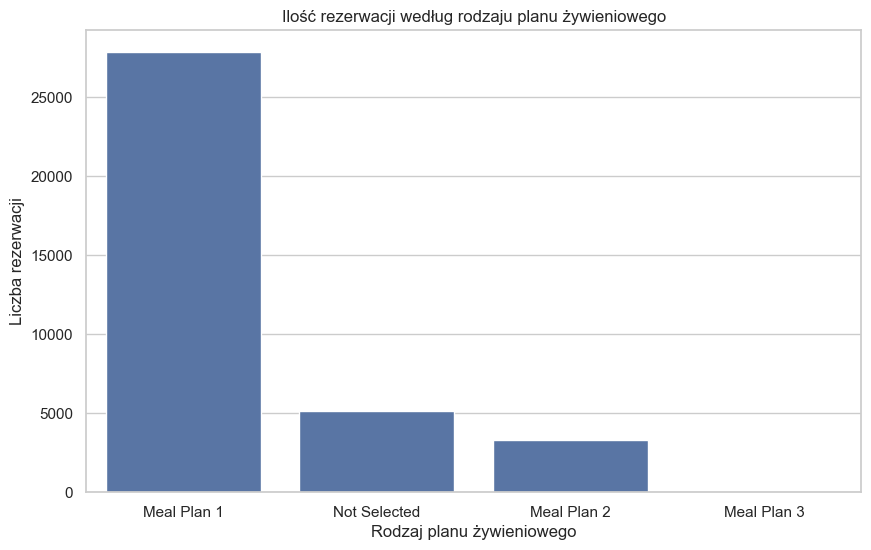

In [230]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='type_of_meal_plan')
plt.title('Ilość rezerwacji według rodzaju planu żywieniowego')
plt.xlabel('Rodzaj planu żywieniowego')
plt.ylabel('Liczba rezerwacji')
plt.show()

Jest tylko 5 rezerwacji z wybranym 'Meal Plan 3'.

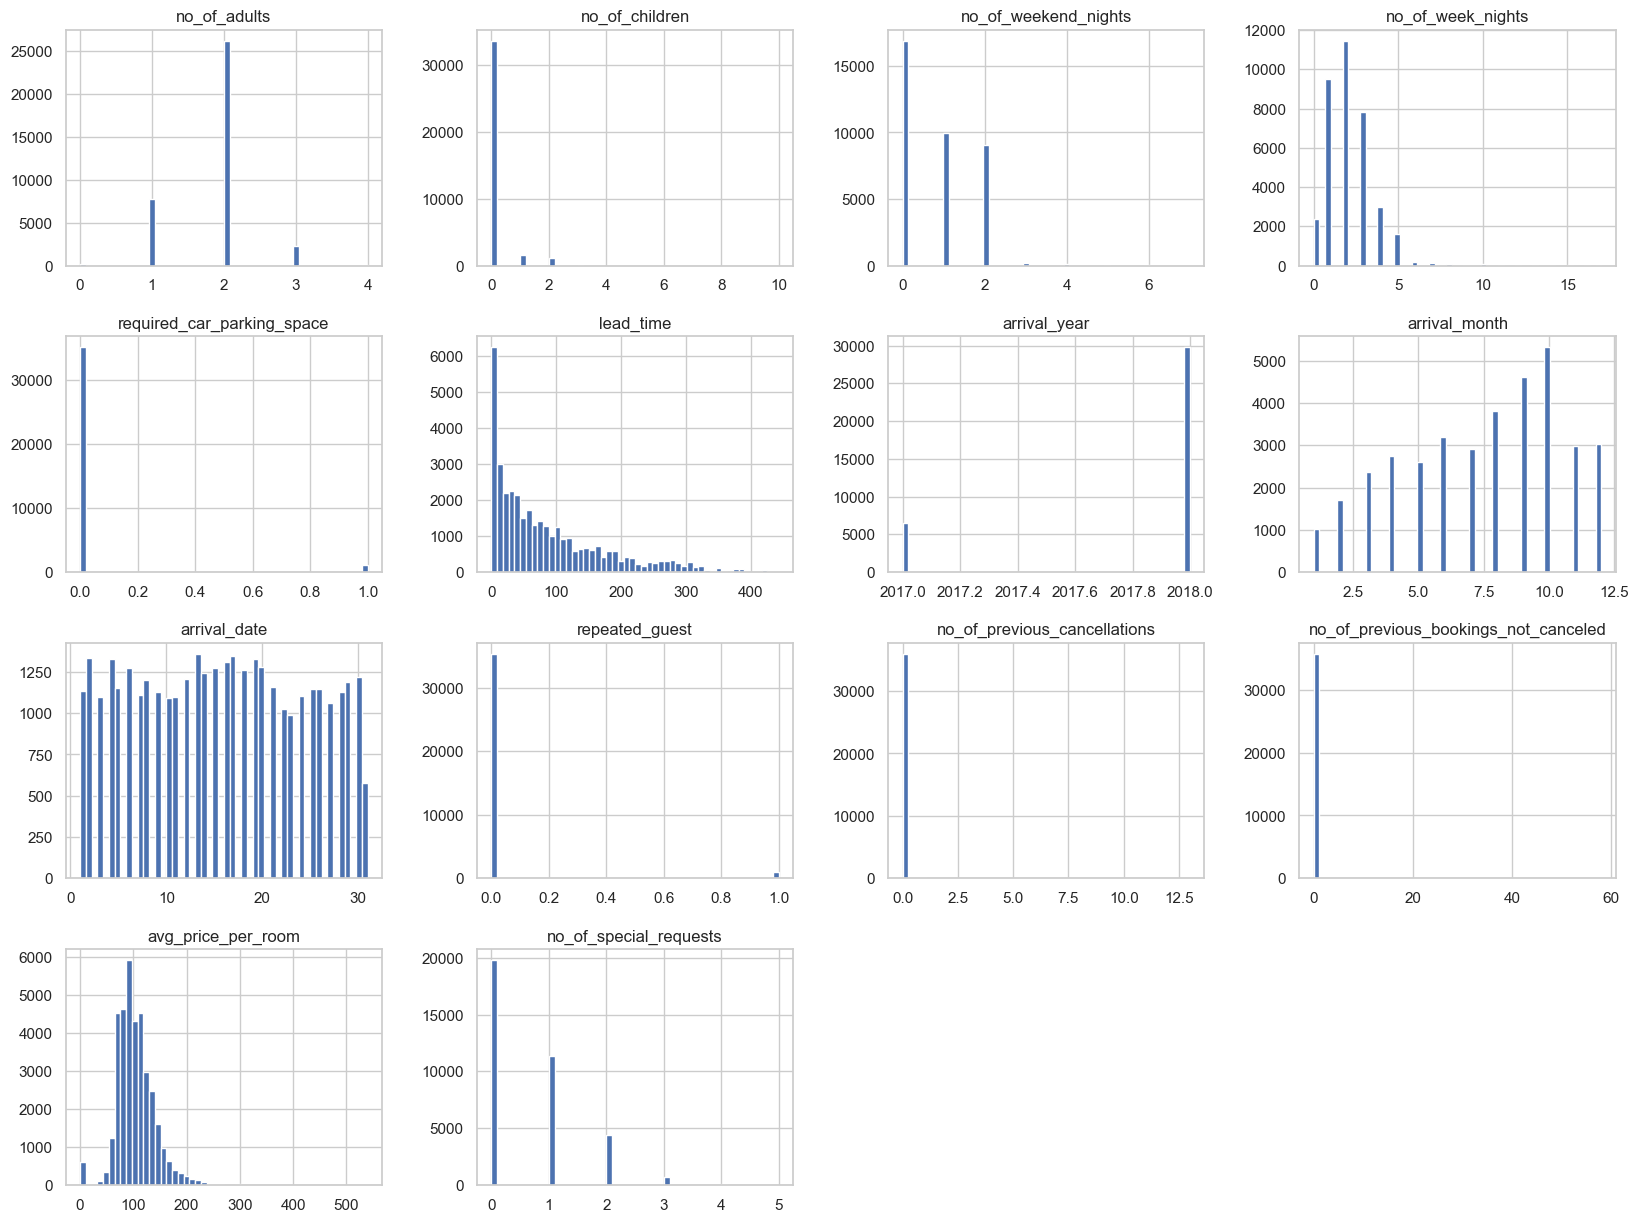

In [231]:
df2.hist(bins=50, figsize=(20,15))

plt.show()

Na histogramach rozkładu obserwacji w każdej kolumnie widać na przykład, że w kolumnie liczba dorosłych każda obserwacja poza wartością równą 2 będzie brana pod uwagę jak odstająca pod warunkiem odstawania w rozumieniu "boxplota" albo wystające poza średnia +2* odchylenie standardowe dlatego póżniej zrezygnowałem z usuwania jakichkolwiek obserwacji odstających. W kolumnie liczba dni w weekend jest gwałtowny spadek między 2 a 3 dni ponieważ mało kto rezerwował na więcej niż 1 tydzień i 5 dni.

### Korelacja

In [232]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


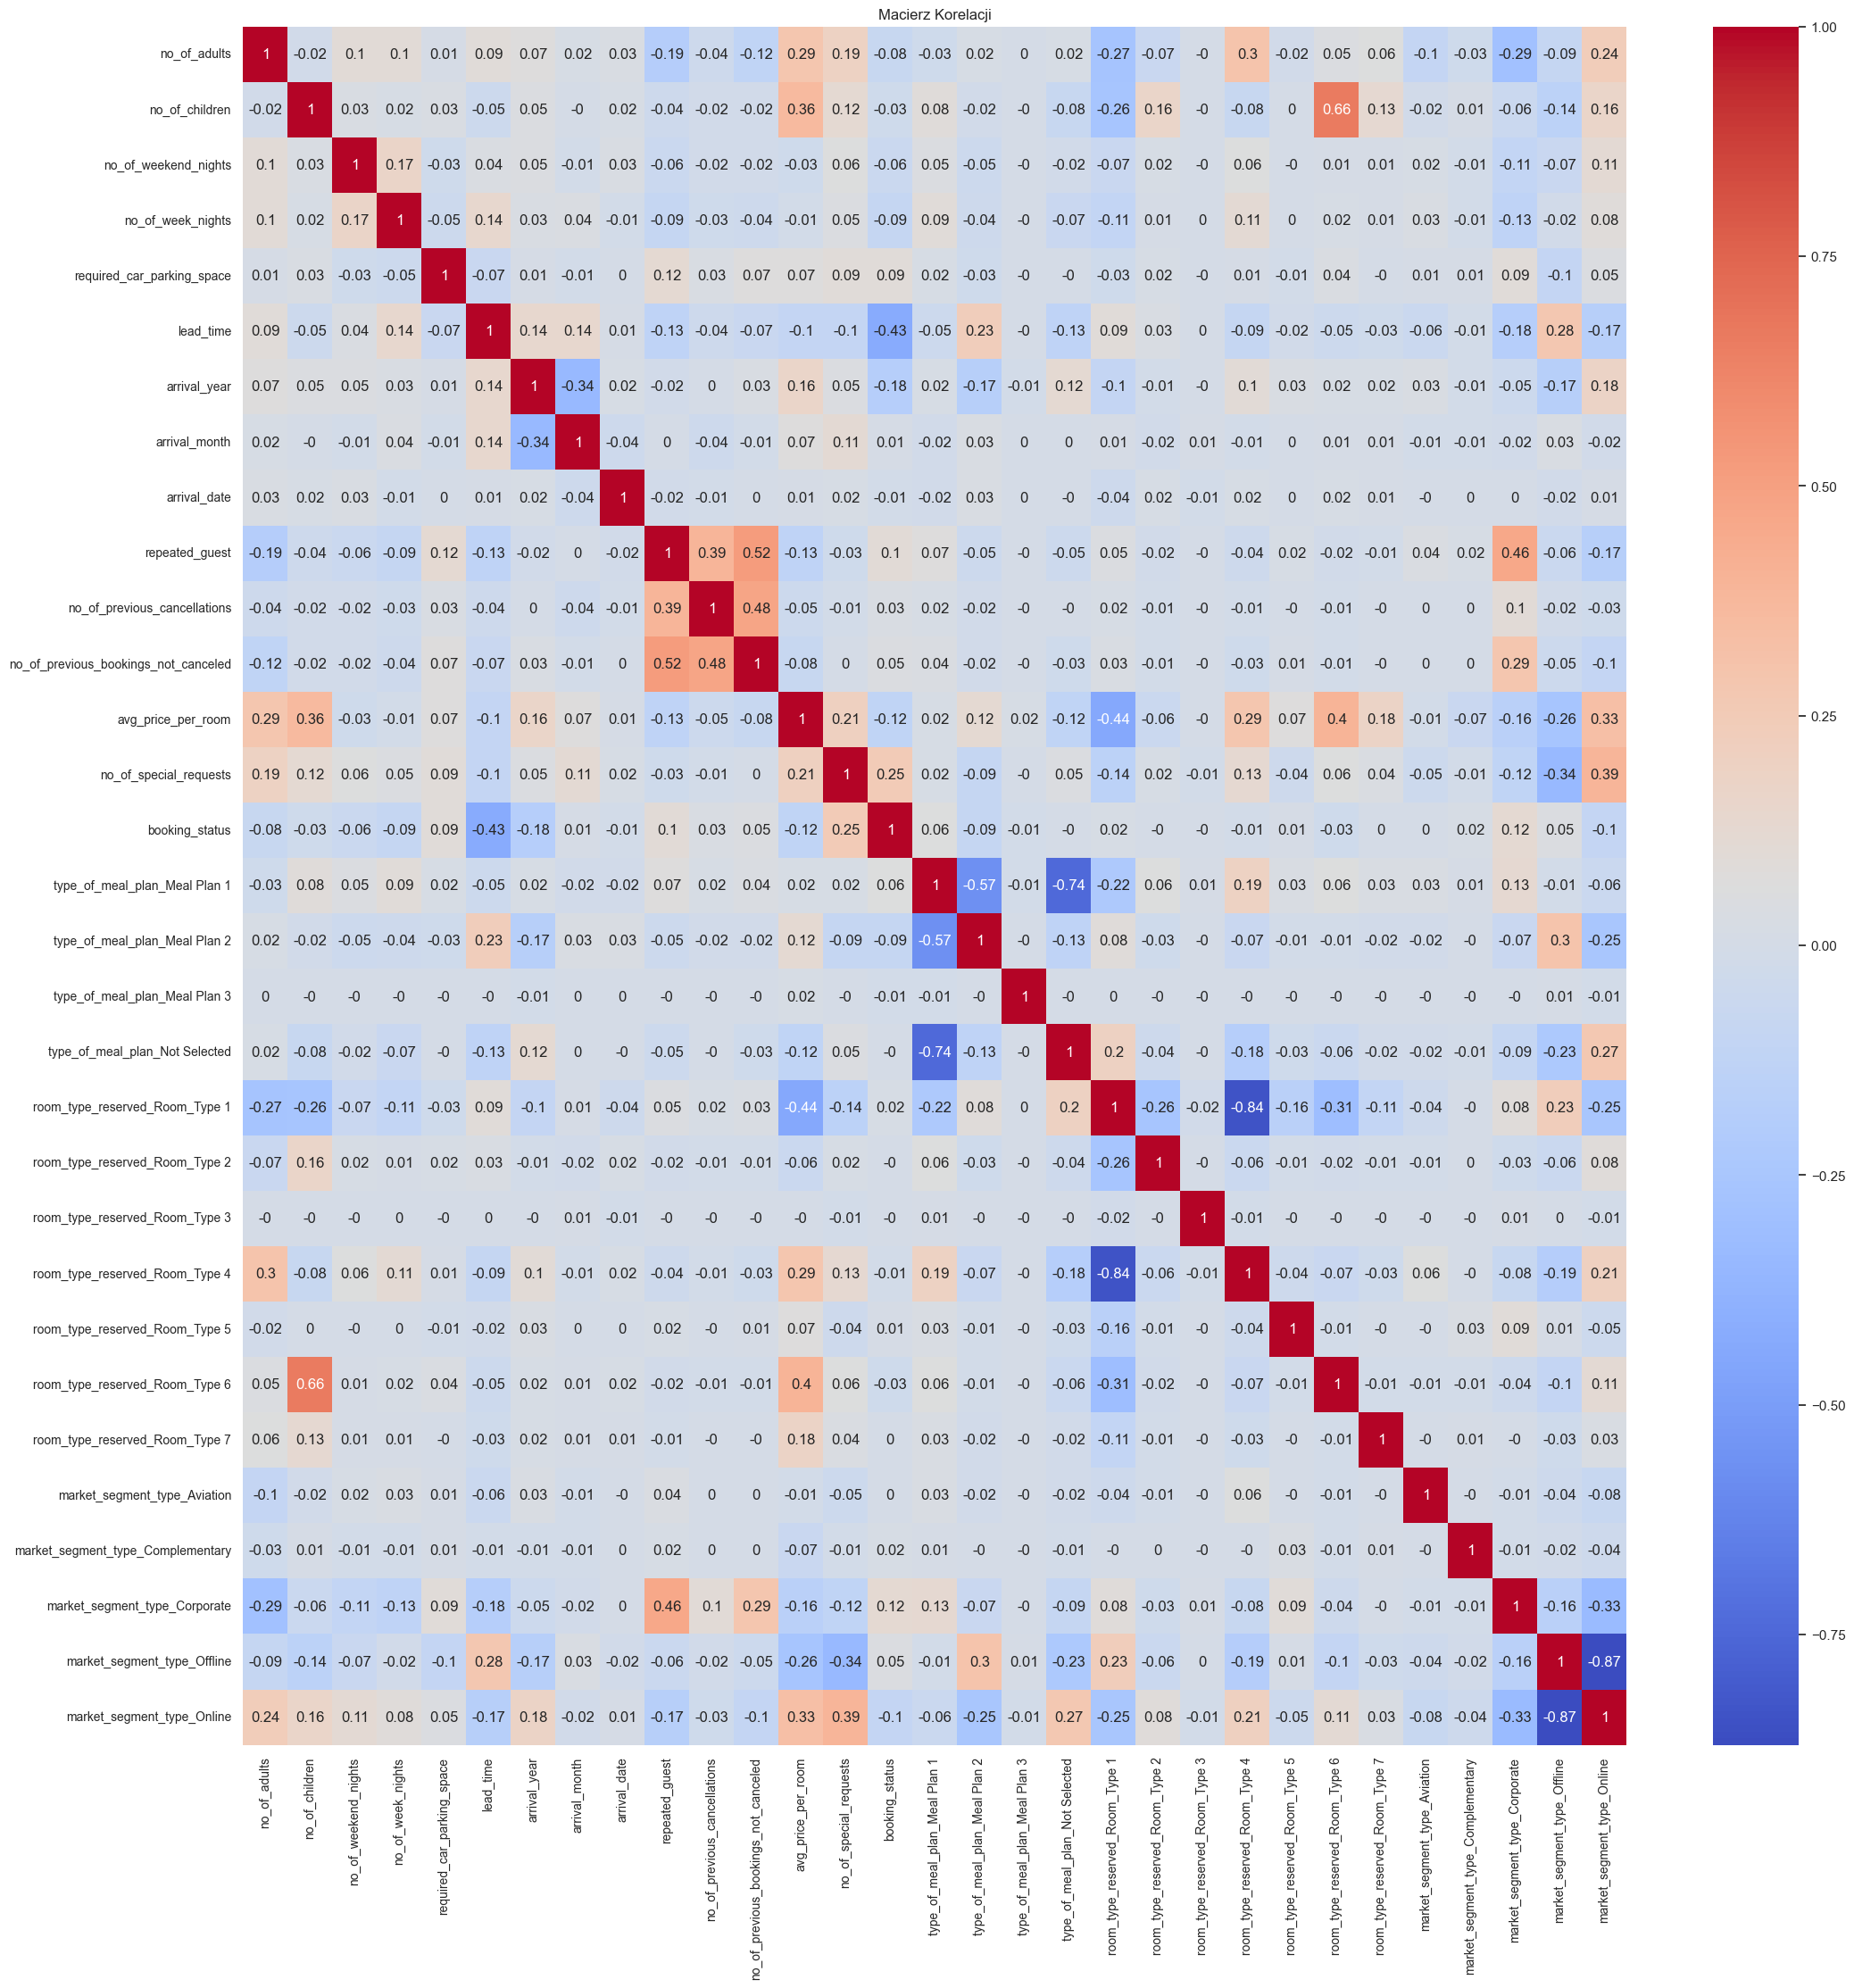

In [233]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Macierz Korelacji")

plt.show()

In [234]:
corr_values = df.corr()

In [235]:
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([ 0,  1,  1,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 

In [236]:
corr_array = np.array(corr_values)

In [237]:
corr_values = pd.DataFrame(corr_array, columns=corr_values.columns, index=corr_values.index)
corr_values

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
no_of_adults,1.000000,-0.021330,0.098208,0.100629,0.009586,0.090115,0.067096,0.024416,0.026915,-0.189656,...,-0.001168,0.302247,-0.015704,0.047392,0.060107,-0.095867,-0.026112,-0.294302,-0.091836,0.242924
no_of_children,-0.021330,1.000000,0.029956,0.024017,0.034357,-0.047849,0.046794,-0.004471,0.024930,-0.036880,...,-0.003097,-0.075597,0.004892,0.656323,0.125398,-0.015511,0.008852,-0.058010,-0.135364,0.158197
no_of_weekend_nights,0.098208,0.029956,1.000000,0.173908,-0.031292,0.039369,0.050057,-0.008588,0.026869,-0.056840,...,-0.000254,0.062902,-0.002726,0.014004,0.006371,0.023190,-0.009275,-0.109658,-0.065399,0.112912
no_of_week_nights,0.100629,0.024017,0.173908,1.000000,-0.048523,0.143077,0.026974,0.039111,-0.010302,-0.090378,...,0.001507,0.106694,0.003906,0.015496,0.013488,0.026705,-0.011819,-0.126885,-0.018214,0.076019
required_car_parking_space,0.009586,0.034357,-0.031292,-0.048523,1.000000,-0.065531,0.013146,-0.013966,0.000299,0.119687,...,-0.002106,0.014663,-0.007063,0.036136,-0.001761,0.005941,0.014447,0.085813,-0.102931,0.054949
lead_time,0.090115,-0.047849,0.039369,0.143077,-0.065531,1.000000,0.138921,0.140686,0.005729,-0.125875,...,0.001543,-0.085701,-0.022045,-0.046583,-0.026958,-0.055617,-0.014918,-0.183134,0.275817,-0.166516
arrival_year,0.067096,0.046794,0.050057,0.026974,0.013146,0.138921,1.000000,-0.335316,0.017272,-0.017283,...,-0.000752,0.103415,0.027983,0.016911,0.021458,0.027364,-0.005705,-0.045695,-0.173425,0.184197
arrival_month,0.024416,-0.004471,-0.008588,0.039111,-0.013966,0.140686,-0.335316,1.000000,-0.040341,0.003085,...,0.007664,-0.010716,0.001889,0.007216,0.005424,-0.005696,-0.010318,-0.024820,0.033352,-0.018400
arrival_date,0.026915,0.024930,0.026869,-0.010302,0.000299,0.005729,0.017272,-0.040341,1.000000,-0.015254,...,-0.009211,0.024386,0.001110,0.018573,0.006584,-0.001692,0.003227,0.002388,-0.015786,0.013874
repeated_guest,-0.189656,-0.036880,-0.056840,-0.090378,0.119687,-0.125875,-0.017283,0.003085,-0.015254,1.000000,...,-0.001794,-0.043365,0.021439,-0.022712,-0.005437,0.042185,0.018602,0.455450,-0.060724,-0.168202


In [238]:
#wylaczenie warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [239]:
corr_values = df.corr()
corr_array = np.array(corr_values)
corr_values = pd.DataFrame(corr_array, columns=corr_values.columns, index=corr_values.index)
corr_values
tril_index = np.tril_indices_from(corr_values)
#trill indices from zwraca indeksy ktore są macierzą dolnie trojkątną
#macierz koerealcji jest symetryczna wiec wystarczy nam gornie trojkatna
# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN #ustawiamy na wartosc na `NA` wszystko na dolnie trjkatnej
    
    
    # co to zip(*tril_index)
#####
# tril_index = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]

# # Rozpakowywanie np tuple przy użyciu *
# result = zip(*tril_index)

# # Wynik to zip((1, 2, 3), (4, 5, 6), (7, 8, 9))

#stack() w Pandas służy do przekształcania DataFrame'u z dwoma poziomami indeksu (np. macierzy korelacji) na Series, 
#usuwając jednocześnie jedno z wymiarów indeksu.
#to_frame(): Metoda to_frame() zamienia Series na DataFrame. W tym przypadku,
#po użyciu stack(), mamy teraz jednowymiarową serię korelacji, a to_frame() zamienia ją na jednokolumnowy DataFrame.
#dalej reset index usuwa index co byl i robi normalny 0,1,2,3, itd
#rename zmienia nazwy kolumn
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))
corr_values['abs_correlation'] = corr_values.correlation.abs()

#jest komunikat o kolumnach ktore nie sa z wartosciami liczbowymi wiec wylacze komunikaty

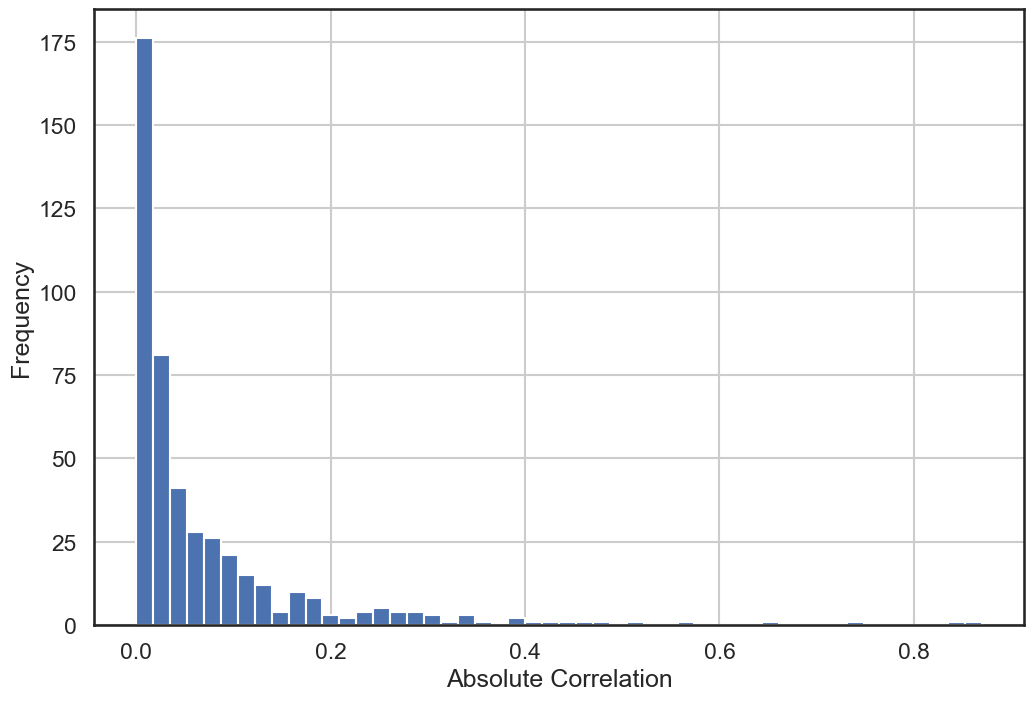

In [240]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [241]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(df2, figsize=(30, 20))

Zobaczmy które zmienne miały korelacje powyżej 0.2


In [242]:
# The most highly correlated values
#Query the columns of a DataFrame with a boolean expression
#query sluzy do filtrowania
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.5')

,feature1,feature2,correlation,abs_correlation
52,no_of_children,room_type_reserved_Room_Type 6,0.656323,0.656323
235,repeated_guest,no_of_previous_bookings_not_canceled,0.517238,0.517238
345,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,-0.572641,0.572641
347,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Not Selected,-0.739019,0.739019
401,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 4,-0.837198,0.837198
464,market_segment_type_Offline,market_segment_type_Online,-0.869991,0.869991


## Obserwacje odstające


In [243]:
df.shape

(35730, 31)

In [244]:
# for col in df.columns:
#     mean = df[col].mean()
#     sd = df[col].std()
#     data = df[(df[col] <= mean+(2*sd))]
    #usuwa wszystkie wartości większe lub równe średnia +2 razy odchylenie standardowe

In [245]:
df.shape

(35730, 31)

In [246]:
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers
#usuwa wszystkie obserwacje odstające w 'rozumieniu boxplota'

In [247]:
# df5=df.copy()
# outliers_in_columns = df5.apply(identify_outliers) # Zidentyfikowanie outliers w każdej kolumnie

# outliers_count_per_column = outliers_in_columns.sum()
# print(outliers_count_per_column)

# df5 = df5[~outliers_in_columns]  # Usunięcie outliers z ramki danych
# df5.shape

# number of weekend nights sie przyjrzzec

In [248]:
df5.shape

(35730, 31)

In [249]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


In [250]:
#train_test_split jest najprostrzym podziałem, StratifiedShuffleSplit dba o to aby było równy stosunek w zbiorze testowym i uczącym tego co przewidujemy

In [251]:
df['booking_status']

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 35730, dtype: int32

# Predykcja

In [252]:
import sklearn
print(sklearn.__version__)

1.2.2


In [253]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


# Preprocessing do regresji

## Skalowanie

In [275]:
binary_variables = ['required_car_parking_space', 'repeated_guest', 'booking_status']
categorical_variables = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
numeric_variables = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                     'lead_time',
                     'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                     'avg_price_per_room', 'no_of_special_requests']

dla danych numerycnzych zastosujemy skalowanie min max

In [276]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [277]:
# df[numeric_variables] = mm.fit_transform(df[numeric_variables])

In [278]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [279]:
# # StratifiedShuffleSplit bardziej skomplikowany podział dzieli na zbiory treningowy
# #i testowy, przy jednoczesnym zachowaniu proporcji klas (etykiet) w obu tych zbiorach.

# # I sposob
# from sklearn.model_selection import StratifiedShuffleSplit
# # split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# # for train_index, test_index in split.split(housing, housing["income_cat"]):
# # strat_train_set = housing.loc[train_index]
# # strat_test_set = housing.loc[test_index]
# # from sklearn.model_selection import StratifiedShuffleSplit




# # II sposob
# predictors = [col for col in list(df) if col != 'booking_status']

# #feature cols
# X = df[predictors]

# #Y
# Y = df['booking_status']
# # Get the split indexes
# #n splits - na ile zbiorow uczacych i testowych dzielimy
# # test_size dzieli 0.7 to zbiór treningowy a testowy to 0.3
# strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
#                                           test_size=0.2, 
#                                           random_state=7)

# train_idx, test_idx = next(strat_shuf_split.split(X, Y))

# # Create the dataframes
# x_train = df.loc[train_idx, predictors]
# y_train = df.loc[train_idx, 'booking_status']

# x_test  = df.loc[test_idx, predictors]
# y_test  = df.loc[test_idx, 'booking_status']

#problem z indeksami

In [280]:
# II sposob za pomoca prostrzej funkcji do podziału na zbiór uczący i testowy

In [281]:
columns_to_convert = [
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 2',
    'type_of_meal_plan_Meal Plan 3',
    'type_of_meal_plan_Not Selected',
    'room_type_reserved_Room_Type 1',
    'room_type_reserved_Room_Type 2',
    'room_type_reserved_Room_Type 3',
    'room_type_reserved_Room_Type 4',
    'room_type_reserved_Room_Type 5',
    'room_type_reserved_Room_Type 6',
    'room_type_reserved_Room_Type 7',
    'market_segment_type_Aviation',
    'market_segment_type_Complementary',
    'market_segment_type_Corporate',
    'market_segment_type_Offline',
    'market_segment_type_Online'
]

# Konwersja wartości boolowskich na wartości całkowite (int) dla wybranych kolumn
df[columns_to_convert] = df[columns_to_convert].astype('int64')

## Podział zbioru

In [282]:
df['booking_status']

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 35730, dtype: int32

In [283]:
from sklearn.model_selection import train_test_split

predictors = [col for col in list(df) if col != 'booking_status']
# predictors = list(df.columns[:15])
X = df[predictors]
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
#dzieli 0.8 to zbiór treningowy a testowy to 0.2

In [284]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 35730, dtype: int32

In [285]:
counts_train = np.bincount(y_train)
print("Liczba 0 w y_train:", counts_train[0])
print("Liczba 1 w y_train:", counts_train[1])

counts_test = np.bincount(y_test)
print("Liczba 0 w y_test:", counts_test[0])
print("Liczba 1 w y_test:", counts_test[1])

Liczba 0 w y_train: 7127
Liczba 1 w y_train: 14311
Liczba 0 w y_test: 4752
Liczba 1 w y_test: 9540


In [286]:
y_train.value_counts(normalize=True)
#normalize daje nam proporcje zamiast liczb - latwiej odczytac

booking_status
1    0.667553
0    0.332447
Name: proportion, dtype: float64

jest około 2 razy więcej nieodwołanych w zbiorze uczącym i testowym tak samo jak w oryginalnym zbiorze nie jest to rażąca dysproporcja.

## Regresja logistyczna (Logistic Regression)

In [287]:
# Regresja logistyczna nie akceptuje pustych wartosci

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=10000)

%time model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(accuracy))

CPU times: total: 3.19 s
Wall time: 1.43 s
Accuracy: 0.801077525888609


 po zastosowaniu StratifiedShuffleSplit Regresja logistyczna ma lepsze accuracy

jakie metryki zastosowac do zmierzenia poprawnosci modleu jesli jest stosunek w y 1:2 kontynuowac lab2

In [289]:
#Regresja logistyczna accuracy 0.8038594
#po zastosowaniu one hot encoding
# ze zwykłym enkodowaniem 0.78

In [290]:
# cm: Macierz pomyłek wygenerowana wcześniej.
# annot=True: Określa, czy wartości macierzy mają być wyświetlane na heatmapie. Jeśli True, to wartości zostaną wyświetlone na heatmapie.
# fmt='d': Określa format wartości na heatmapie. W tym przypadku 'd' oznacza format liczb całkowitych.
# cmap='Blues': Określa paletę kolorów używaną w heatmapie. W tym przypadku używana jest paleta "Blues".

In [291]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[2943 1809]
 [1034 8506]]


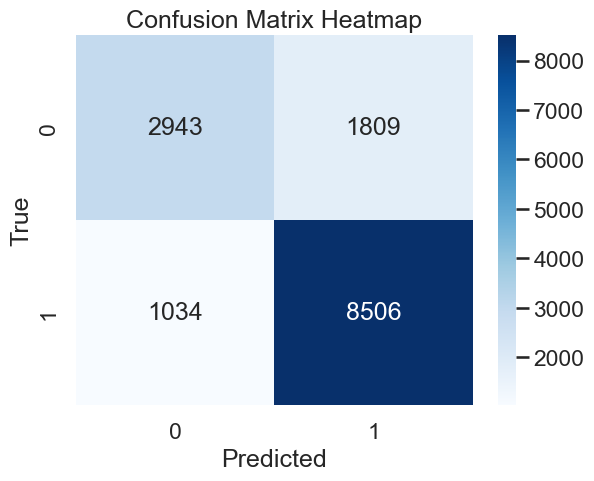

In [292]:
confusion = confusion_matrix(y_test, y_pred)

# Stwórz heatmapę
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# K Nearest Neighbours (K najbliższych sąsiadów)

## Preprocess do KNN

In [293]:
df3.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


In [294]:
from sklearn.preprocessing import LabelEncoder
# Inicjalizacja LabelEncoder
label_encoder = LabelEncoder()

# Kolumny, do których chcesz zastosować LabelEncoder
columns_to_encode = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Zastosowanie LabelEncoder do każdej kolumny
for column in columns_to_encode:
    df3[column] = label_encoder.fit_transform(df3[column])


In [295]:
from sklearn.model_selection import train_test_split

predictors = [col for col in list(df3) if col != 'booking_status']
predictors = list(df3.columns[:10])
X = df3[predictors]
y = df3['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
#dzieli 0.8 to zbiór treningowy a testowy to 0.2

In [296]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

In [297]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [298]:
#warto ustawić parametr k przy binarnej klasyfikacji na nieparzysty aby uniknac ze np 2 sasiedzi są z tej klasy i 2 z tej
#jesli mamy dużo wymiarów czyli predyktorów odległości między punktami rosną i koncept "bliskości" zaciera się dlatego KNN jest
#wrażliwy na dużą liczbę wymiarów, nie lubi też dużych zbiorów danych

In [299]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21438 entries, 7679 to 5907
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   no_of_adults                21438 non-null  int64
 1   no_of_children              21438 non-null  int64
 2   no_of_weekend_nights        21438 non-null  int64
 3   no_of_week_nights           21438 non-null  int64
 4   type_of_meal_plan           21438 non-null  int32
 5   required_car_parking_space  21438 non-null  int64
 6   room_type_reserved          21438 non-null  int32
 7   lead_time                   21438 non-null  int64
 8   arrival_year                21438 non-null  int64
 9   arrival_month               21438 non-null  int64
dtypes: int32(2), int64(8)
memory usage: 1.6 MB


In [300]:
knn = KNeighborsClassifier()
%time knn = knn.fit(X_train, y_train.values.ravel())
%time y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

CPU times: total: 62.5 ms
Wall time: 61.5 ms
CPU times: total: 688 ms
Wall time: 691 ms
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      4752
           1       0.81      0.88      0.85      9540

    accuracy                           0.79     14292
   macro avg       0.76      0.74      0.75     14292
weighted avg       0.78      0.79      0.78     14292

Accuracy score:  0.79
F1 Score:  0.85


Text(0.5, 67.08333333333331, 'Ground Truth')

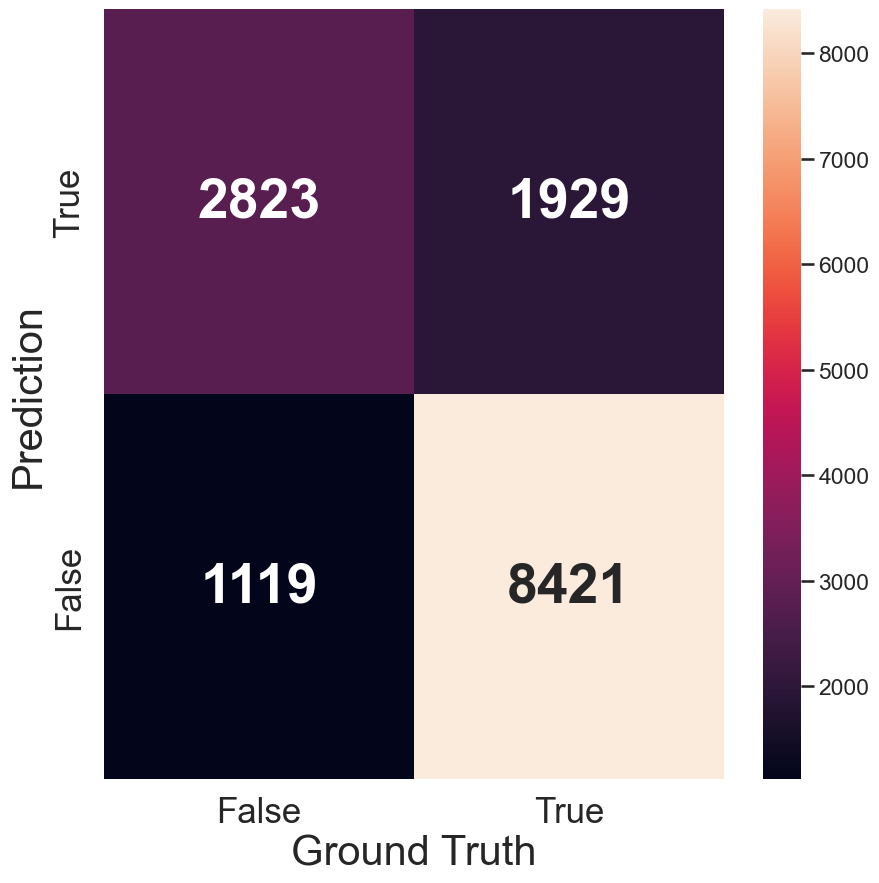

In [301]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION